#Francis Ndikum Nji

#Campus ID: RN49536

Solution to Assignment 2 Question 2

#Solution to Question 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install causalgraphicalmodels
!pip install causal-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd6

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from causalgraphicalmodels import CausalGraphicalModel
from causalgraphicalmodels.examples import fork, chain, collider

In [4]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Fall_2022/IS_800_Causality_New/Assignments/Assignment_2/dataset2.csv')
df


,a,b,c,d,e,f,g
0,-0.160288,-0.284273,0.329835,0.580409,0.290660,-0.129441,0.279238
1,0.167446,1.553072,-1.684178,0.248919,0.271667,0.454602,0.550966
2,-0.481466,0.318975,0.033325,0.440888,-0.518865,0.038540,-0.253289
3,0.679650,2.499745,-0.627434,0.224881,0.655549,0.708412,0.192088
4,0.723526,-1.829126,-1.313232,0.767057,-0.402993,-0.753407,-0.197136
...,...,...,...,...,...,...,...
99995,-0.810889,1.092316,0.202198,0.878631,0.210047,0.173791,0.384489
99996,-0.156954,-2.361714,-0.686803,0.624103,-0.329003,-0.824205,0.137536
99997,0.706541,2.819210,-0.086552,0.452939,0.949799,0.851835,0.988266
99998,-0.334048,7.181633,1.119834,0.900276,1.383060,2.084893,1.136538


In [5]:
#For statistical data analysis
df.describe()

,a,b,c,d,e,f,g
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.026318,0.518394,-0.000381,0.499681,0.185118,0.006462,0.245928
std,0.817127,3.017190,0.998161,0.288957,0.627989,1.001090,0.423521
min,-3.477093,-13.087484,-4.668703,0.000029,-2.784564,-4.484578,-1.662359
25%,-0.524303,-1.509454,-0.673662,0.249653,-0.239721,-0.667133,-0.039137
50%,0.022179,0.514127,-0.000392,0.500609,0.186136,0.007828,0.245427
75%,0.578699,2.545779,0.672257,0.750564,0.607838,0.678485,0.532553
max,3.659236,14.497473,4.355135,0.999979,2.844512,4.595666,1.975937


In [6]:
#To understand the column metadata and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   a       100000 non-null  float64
 1   b       100000 non-null  float64
 2   c       100000 non-null  float64
 3   d       100000 non-null  float64
 4   e       100000 non-null  float64
 5   f       100000 non-null  float64
 6   g       100000 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB


In [7]:
#Check for null values
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
dtype: int64

#Solution to Question 2 - Constraint-based causal discovery Approach
[PC Algorithm](https://causal-learn.readthedocs.io/en/latest/search_methods_index/Constraint-based%20causal%20discovery%20methods/PC.html)

In [8]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import kci, chisq, fisherz

In [9]:
#convert pandas dataframe to a numpy array, acceptable by our algorithm
df1 = df.to_numpy()

  0%|          | 0/7 [00:00<?, ?it/s]

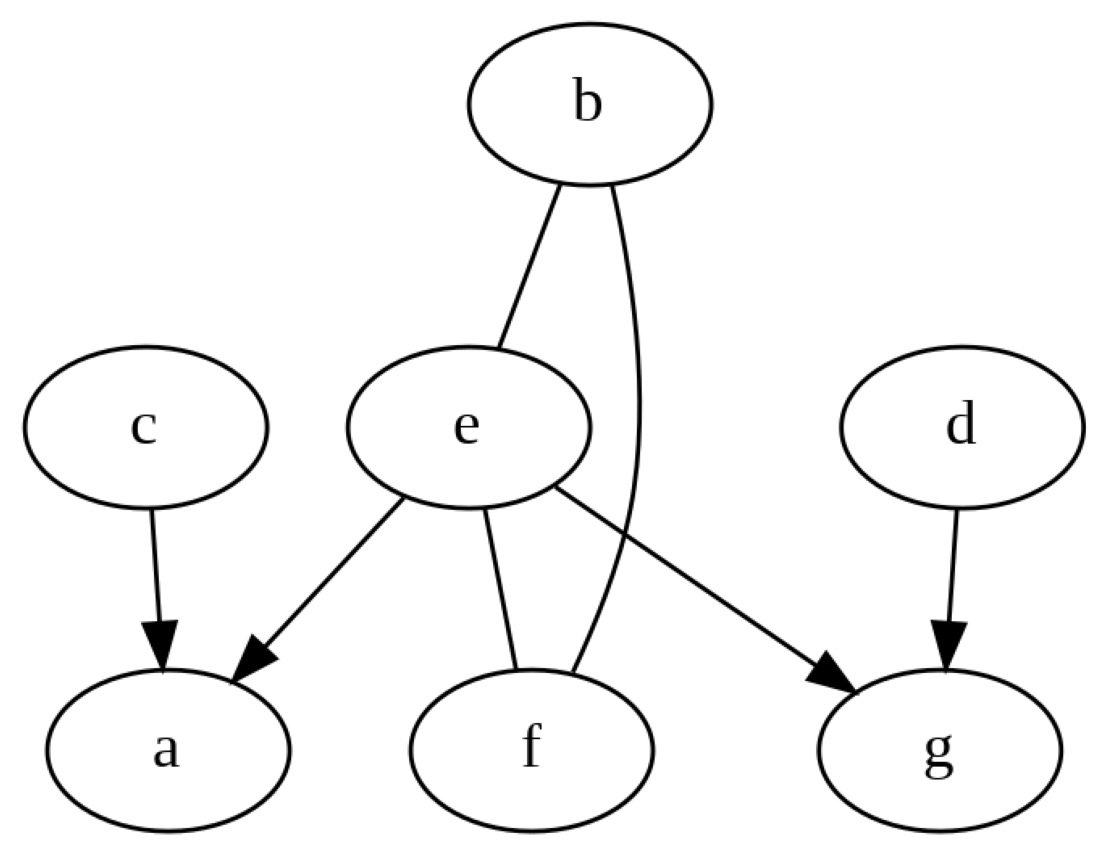

In [10]:
# significance level (alpha) at 0.05
# Here I used “fisherz”: Fisher’s Z conditional independence test because there are no missing values in the data, otherwise “mv_fisherz”
cg = pc(df1, 0.05, fisherz, True, 0, -1)

# visualization using pydot
cols = df.columns
cg.draw_pydot_graph(labels=cols)

#Solution to Question 3 - Score-based causal discovery approach
[GES Algorithm](https://causal-learn.readthedocs.io/en/latest/search_methods_index/Score-based%20causal%20discovery%20methods/GES.html#algorithm-introduction)

In [11]:
df1.shape

(100000, 7)

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0 -1]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [ 0 -1  0  0  0  0 -1]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  1  1  0  0]]
[[ 0  0  1  0  1  0  0]
 [ 0  0  0  0 -1 -1  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [-1 -1  0  0  0  0 -1]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0 

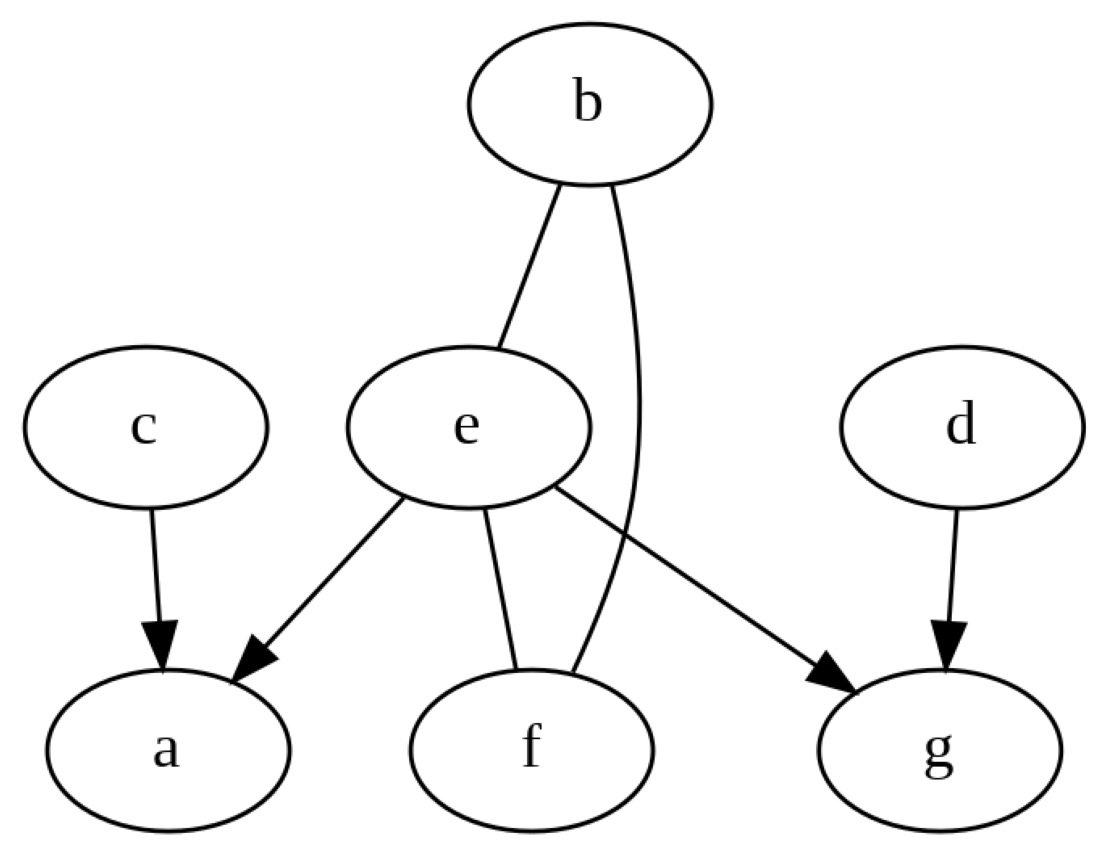

In [12]:
from causallearn.search.ScoreBased.GES import ges

from causallearn.utils.GESUtils import local_score_BIC


Record = ges(df1, score_func = "local_score_BIC", maxP = None, parameters = None)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'], labels=cols)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

#Solution to Question 4 - Draw all possible causal graphs for CPDAGs 

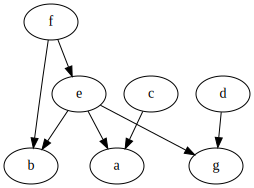

In [13]:
graph= CausalGraphicalModel(
    nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
    edges = [('c','a'),('e','a'),('f','e'),('e','g'),('e','b'),('f','b'),('d','g')]
)
graph.draw()

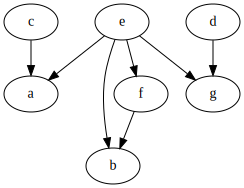

In [14]:
graph= CausalGraphicalModel(
    nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
    edges = [('c','a'),('e','a'),('e','f'),('e','g'),('e','b'),('f','b'),('d','g')]
)
graph.draw()